# Accessing Drill from R
This notebook demonstrates how to access Drill programmatically from R.  In order to do so, you will need to first install the `Sergeant` (get it... Drill Sergeant HAHAHAHA) library which is available here: https://github.com/hrbrmstr/sergeant

You can install the library with the following command:
```R
devtools::install_github("hrbrmstr/sergeant")
```
The Sergeant module supports several ways of interacting with Drill:

**`DBI`**

-   As complete of an R `DBI` driver has been implemented using the Drill REST API, mostly to facilitate the `dplyr` interface. Use the `RJDBC` driver interface if you need more `DBI` functionality.
-   This also means that SQL functions unique to Drill have also been "implemented" (i.e. made accessible to the `dplyr` interface). If you have custom Drill SQL functions that need to be implemented please file an issue on GitHub.

**`RJDBC`**

-   `drill_jdbc`: Connect to Drill using JDBC, enabling use of said idioms. See `RJDBC` for more info.
-   NOTE: The DRILL JDBC driver fully-qualified path must be placed in the `DRILL_JDBC_JAR` environment variable. This is best done via `~/.Renviron` for interactive work. i.e. `DRILL_JDBC_JAR=/usr/local/drill/jars/drill-jdbc-all-1.9.0.jar`

**`dplyr`**:

-   `src_drill`: Connect to Drill (using dplyr) + supporting functions

See `dplyr` for the `dplyr` operations (light testing shows they work in basic SQL use-cases but Drill's SQL engine has issues with more complex queries).

This short notebook will demonstrate how to connect to drill, execute a query and retrieve the results.

First you have to load the `Sergeant` library with the following command:
```R
library( sergeant )
```


In [ ]:
library(sergeant)

## Step 1:  Connect to Drill
The first step is to connect to Drill. You can do this with the `drill_connection()` method as follows:

```R
dc <- drill_connection("localhost") 
```

It is a good idea to check to see if the connection is in fact active, which can be accomplished with the `drill_active(<connection>)` method.

In [ ]:
dc <- drill_connection("localhost") 
drill_active(dc)

## Step 2:  Execute a Query
The next step is to actually execute a query.  The `drill_query(<connection>, <query>)` method takes a connection and a query string as arguments and returns the query results.  Try it out below.

In [ ]:
query_result <- drill_query(dc, "SELECT * FROM cp.`employee.json` limit 100")

## That's it!
That's really all there is to using R to query Drill and retrieve the results.  

In [5]:
query_result

store_id,gender,department_id,birth_date,supervisor_id,last_name,position_title,hire_date,management_role,salary,marital_status,full_name,employee_id,education_level,first_name,position_id
0,F,1,1961-08-26,0,Nowmer,President,1994-12-01,Senior Management,80000,S,Sheri Nowmer,1,Graduate Degree,Sheri,1
0,M,1,1915-07-03,1,Whelply,VP Country Manager,1994-12-01,Senior Management,40000,M,Derrick Whelply,2,Graduate Degree,Derrick,2
0,M,1,1969-06-20,1,Spence,VP Country Manager,1998-01-01,Senior Management,40000,S,Michael Spence,4,Graduate Degree,Michael,2
0,F,1,1951-05-10,1,Gutierrez,VP Country Manager,1998-01-01,Senior Management,35000,M,Maya Gutierrez,5,Bachelors Degree,Maya,2
0,F,2,1942-10-08,1,Damstra,VP Information Systems,1994-12-01,Senior Management,25000,M,Roberta Damstra,6,Bachelors Degree,Roberta,3
0,F,3,1949-03-27,1,Kanagaki,VP Human Resources,1994-12-01,Senior Management,15000,M,Rebecca Kanagaki,7,Bachelors Degree,Rebecca,4
9,F,11,1922-08-10,5,Brunner,Store Manager,1998-01-01,Store Management,10000,S,Kim Brunner,8,Bachelors Degree,Kim,11
21,F,11,1979-06-23,5,Blumberg,Store Manager,1998-01-01,Store Management,17000,M,Brenda Blumberg,9,Graduate Degree,Brenda,11
0,M,5,1949-08-26,1,Stanz,VP Finance,1994-12-01,Senior Management,50000,M,Darren Stanz,10,Partial College,Darren,5
1,M,11,1967-06-20,5,Murraiin,Store Manager,1998-01-01,Store Management,15000,S,Jonathan Murraiin,11,Graduate Degree,Jonathan,11


# In Class Exercise:
Using the data in the `dailybots.csv` file use Drill to:

1. Query the file to produce a summary of infections by day.
2. Store this data in a dataframe.
3. Create a line plot of this data by calling the .plot() method on the dataframe


In [7]:
query_result <- drill_query(dc,"SELECT columns[0] AS bot_day, SUM(CAST( columns[3] AS INT )) AS bot_count
FROM dfs.`/home/merlinuser/dailybots.csv` 
WHERE NOT (columns[0] = 'date')
GROUP BY columns[0]")

Parsed with column specification:
cols(
  bot_count = col_integer(),
  bot_day = col_date(format = "")
)


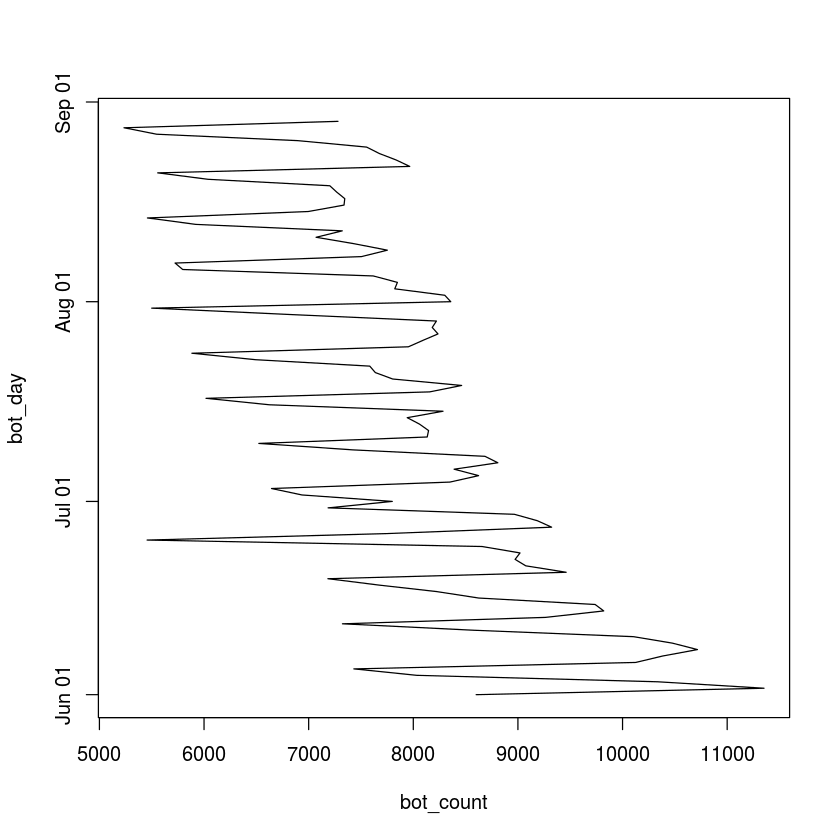

In [21]:
# Plot the bar chart. 
plot( query_result, type="l")